# Introduction

![](https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/TPFN2.png)

例如:

    望京SOHO,有家公司研发出一台通过超级红外即可判别某人是否得了新冠, 为了验证这台机器是否靠谱, 对100人样本进行测试, 其中有10人感染了新冠, 分析以下指标对该产品进行可信度评估.
    经过测试, 该机器诊断出12人为新冠患者(8人为真患者positive, 4人为健康人negative), 那么88人中存在2人为真患者, 86人为健康人.
    
| |人数|解释
:--:|:--:|:------
<img width="150"/>|<img width="150"/>|<img width="400"/>
TP| 8 | 
FP| 4 |(假阳性, 健康人被机器错误的判断为了阳性, 发生第一类错误)
FN| 2 |(假阴性, 新冠患者没能被机器识别出(阳性), 错误的将其判为健康人, 发生第二类错误(严重))
TN| 86|

## 灵敏度/召回率/真阳性率(Sensitivity / Recall / True Positive Rate)

Sensitivity tells us what proportion of the positive class got correctly classified.

> $$
  Sensitivity = \dfrac{TP}{TP + FN} = \dfrac{8}{8 + 2} = \dfrac{8}{10}
  $$

**分母为真实样本中阳性数量, 从真实样本中, 分辨出阳性的概率, 检测出有病人(阳性)的能力**

Sensitivity/Recall 表示能够识别出新冠患者的能力, 不能只从这一个指标衡量模型(机器)的可靠与否, 比如,

机器作弊把100人都识别为患者, 则$TP=10, FN=0$, 所以$Sensitivity/Recall = 100\%$, 机器太灵敏过度了.

## 特异性(Specificity / True Negative Rate)

Specificity tells us what proportion of the negative class got correctly classified.

> $$
  Specificity = \dfrac{TN}{TN + FP} = \dfrac{86}{86 + 4} = \dfrac{86}{90}
  $$

**分母为真实样本中阴性数量, 从真实样本中, 分辨出阴性的概率, 检测出健康人(阴性)的能力**

如果机器作弊把100人都识别为患者, 则$TN=0, FP=90$没有检测出阴性的人, 所以 $Specificity = 0\%$, 检测不出健康的人.

## 假阳性率(False Positive Rate)

FPR tells us what proportion of the negative class got incorrectly classified by the classifier.

> $$
  FPR = \dfrac{FP}{FP + TN} = 1 - Specificity = \dfrac{4}{4 + 86} = \dfrac{4}{90}
  $$
 
**分母为真实样本中阴性数量, 误诊率, 没有病却被判为有病的所在的比例 (犯第一类错误)**

## 精确度(Precision)

Out of all the positive classes we have predicted, how many are actually positive.

> $$
  Precision = \dfrac{TP}{TP + FP} = \dfrac{8}{8 + 4} = \dfrac{8}{12}
  $$

**分母为机器检测出阳性的数量, 预测的结果中阳性所在比例**

如果机器作弊把100人都识别为患者, 则$TP=10, FP=90$, 所以$Precision = \dfrac{10}{10 + 90} = \dfrac{10}{100}$, 虽然召回率为100%, 但是精确度太低, 机器一样不靠谱.

## AUC-ROC

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis.

> The higher the AUC, the better the performance of the model at distinguishing between the positive and
> negative classes.[^av_auc]

**AUC-ROC curve is only for binary classification problems**

![AUROC](https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/auroc/auroc.png){.center}

Point|Figure|Description 
:-:|:--:|:----
A|![][auc_A]|All the Positive class points are classified correctly and all the Negative class points are classified incorrectly.
B|![][auc_B]|The number of incorrectly Negative class points is lower compared to the previous threshold.
C,D|![][auc_CD]|For the same number of incorrectly classified Negative class points, the classifier predicted a higher number of Positive class points.
E|![][auc_E]|Correctly classify all the Negative class points.

### Codes

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

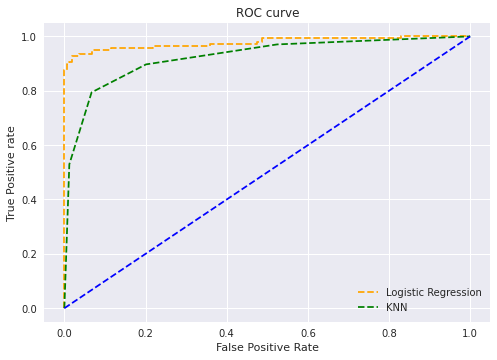

In [2]:
plt.style.use('seaborn')
## Binary-Class Classification

# Make Data

X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Logist Vs Knn

log_rgr = LogisticRegression()
knn_cls = KNeighborsClassifier(n_neighbors=4)

log_rgr.fit(X_train, y_train)
knn_cls.fit(X_train, y_train)

log_pred_prob = log_rgr.predict_proba(X_test)
knn_pred_prob = knn_cls.predict_proba(X_test)

# ROC curve

fpr1, tpr1, thresh1 = roc_curve(y_test, log_pred_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_pred_prob[:,1], pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot([0, 1], [0, 1], '--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best');

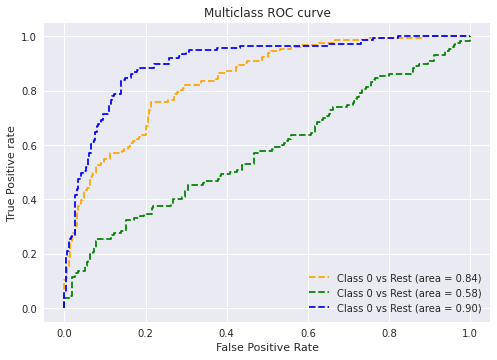

In [3]:
## Multi-Class Classification

### Make Data

X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Model

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

for i, c in enumerate(('orange', 'green', 'blue')):    
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--',color=c, label='Class 0 vs Rest (area = %0.2f)' % roc_auc)
    
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best');

# References

#. https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
#. http://bookshadow.com/weblog/2014/06/10/precision-recall-f-measure
#. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

[^av_auc]: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

[auc_A]: https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/auroc/auc_A.png

[auc_B]: https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/auroc/auc_B.png

[auc_CD]: https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/auroc/auc_CD.png

[auc_E]: https://gitee.com/qrsforever/blog_source_assets/raw/master/AI/auroc/auc_E.png